<a href="https://colab.research.google.com/github/Aneesh236/fake-insurance-detection-using-ADASYN-and-SMOTE/blob/main/fake_insurance_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing** **libraries**

In [ ]:
#Importing the essential datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from collections import Counter
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline


In [ ]:
#Reading the file

df = pd.read_csv("/content/drive/MyDrive/US_claims.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [ ]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

**Data preprocessing**

Data Formatting



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
#Replacing the rows with ? to NaN
df.replace('?', np.nan, inplace = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
# finding the missing values, values with NaN
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
#checking for duplicate columns
df = df.loc[: ,~df.columns.duplicated()]
df.shape

(19611, 75)

In [ ]:
#Deeting duplicated rows
df.transpose()
df.drop_duplicates(keep=False,inplace=True)
df.transpose()
df.shape

(13841, 75)

**Data cleaning**

Filling the NaN rows with mode of that column

In [ ]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [ ]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [ ]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [ ]:
#Rechecking for missing values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
#CHECKING THE RELEVANCE OF THE COLUMNS BY ITS UNIQUENESS IN THE VALUE
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [ ]:
#DROPPING THE UNNECESSARY COLUMNS based on self understanding
to_drop = ['policy_number','policy_bind_date','policy_state','policy_deductable','insured_zip','incident_location','incident_date','insured_sex',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_education_level      1000 non-null   object 
 6   insured_occupation           1000 non-null   object 
 7   insured_relationship         1000 non-null   object 
 8   capital-gains                1000 non-null   int64  
 9   capital-loss                 1000 non-null   int64  
 10  incident_type                1000 non-null   object 
 11  collision_type               1000 non-null   object 
 12  incident_severity            1000 non-null   object 
 13  authorities_contact

**Dimensionality Reduction**

Finding the correlation among the columns




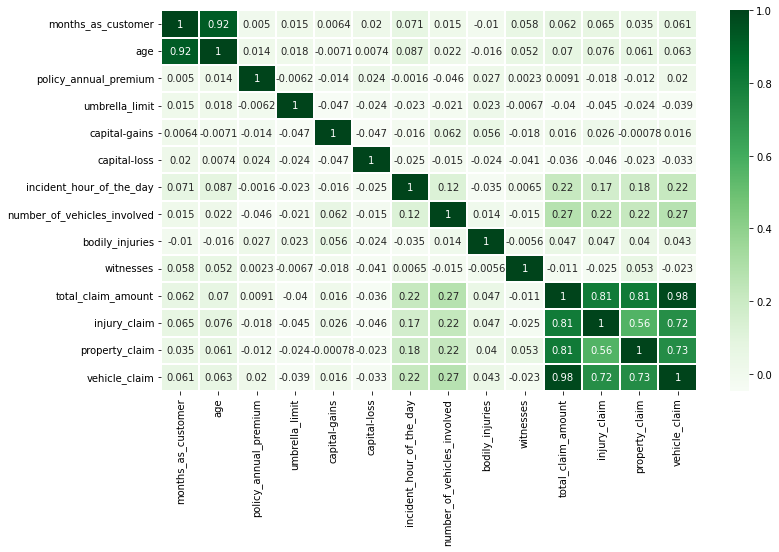

In [ ]:

plt.figure(figsize = (12, 7))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1,cmap='Greens')
plt.show()

From the above plot, we can see that there is high correlation between age and months_as_customer.We will drop the "Age" column. Also there is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. So we will drop the total claim column.

In [ ]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_annual_premium        1000 non-null   float64
 3   umbrella_limit               1000 non-null   int64  
 4   insured_education_level      1000 non-null   object 
 5   insured_occupation           1000 non-null   object 
 6   insured_relationship         1000 non-null   object 
 7   capital-gains                1000 non-null   int64  
 8   capital-loss                 1000 non-null   int64  
 9   incident_type                1000 non-null   object 
 10  collision_type               1000 non-null   object 
 11  incident_severity            1000 non-null   object 
 12  authorities_contacted        1000 non-null   object 
 13  incident_hour_of_th

**Splitting dataset into training and testing sets**

In [ ]:

le = LabelEncoder()
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])


In [ ]:

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

**Data Transformation**

In [ ]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

In [ ]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [ ]:
#Adding dummy values to the categorical columns
cat_df = pd.get_dummies(cat_df, drop_first = True)
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
1,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])
num_df.head()

,months_as_customer,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,0,53300,0,5,1,1,2,6510,13020,52080
1,228,5000000,0,0,8,1,0,0,780,780,3510
2,134,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [ ]:
#Combining the numerical and categorical columns after encoding
X = pd.concat([num_df, cat_df], axis = 1)

In [ ]:
X.head()

,months_as_customer,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,0,53300,0,5,1,1,2,6510,13020,...,1,0,0,0,0,0,0,1,1,1
1,228,5000000,0,0,8,1,0,0,780,780,...,0,1,0,0,0,0,0,1,0,0
2,134,5000000,35100,0,7,3,2,3,7700,3850,...,0,1,0,0,0,0,0,1,0,0
3,256,6000000,48900,-62400,5,1,1,2,6340,6340,...,0,0,0,0,0,0,0,1,0,0
4,228,6000000,66000,-46000,20,1,0,1,1300,650,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
# splitting data into training set and test set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train.head()

,months_as_customer,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
653,109,6000000,0,0,17,3,1,3,16560,16560,...,1,1,0,0,0,0,0,1,0,1
31,166,8000000,27500,0,10,3,2,2,7460,7460,...,1,0,0,0,0,0,0,1,0,0
953,229,0,42600,-44400,3,1,1,0,420,840,...,0,1,0,0,0,1,0,0,0,1
529,15,0,33500,-58900,10,1,1,3,6870,13740,...,0,0,0,0,0,0,0,1,1,0
618,97,0,0,-32600,22,1,1,0,10060,10060,...,0,0,1,0,0,0,0,0,0,0


**Re-scaling**

In [ ]:
# Scaling the numeric values in the dataset
num_df = X_train[['months_as_customer',  'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)


In [ ]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()


,months_as_customer,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
653,-0.850675,2.146235,-0.902285,0.945721,0.767126,1.094608,0.011443,1.376481,1.863635,1.855250,1.056040
31,-0.360133,3.016331,0.088516,0.945721,-0.238721,1.094608,1.237495,0.478776,-0.004854,-0.002938,0.751556
953,0.182046,-0.464051,0.632556,-0.640308,-1.244568,-0.860049,0.011443,-1.316634,-1.450366,-1.354718,-1.840274
529,-1.659639,-0.464051,0.304691,-1.158268,-0.238721,-0.860049,0.011443,1.376481,-0.125998,1.279416,0.896902
618,-0.953947,-0.464051,-0.902285,-0.218796,1.485588,-0.860049,0.011443,-1.316634,0.529000,0.527973,-0.684401


**Concatenating the scaled data into the training set**

In [ ]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)
X_train = pd.concat([scaled_num_df, X_train], axis = 1)
X_train

,months_as_customer,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
653,-0.850675,2.146235,-0.902285,0.945721,0.767126,1.094608,0.011443,1.376481,1.863635,1.855250,...,1,1,0,0,0,0,0,1,0,1
31,-0.360133,3.016331,0.088516,0.945721,-0.238721,1.094608,1.237495,0.478776,-0.004854,-0.002938,...,1,0,0,0,0,0,0,1,0,0
953,0.182046,-0.464051,0.632556,-0.640308,-1.244568,-0.860049,0.011443,-1.316634,-1.450366,-1.354718,...,0,1,0,0,0,1,0,0,0,1
529,-1.659639,-0.464051,0.304691,-1.158268,-0.238721,-0.860049,0.011443,1.376481,-0.125998,1.279416,...,0,0,0,0,0,0,0,1,1,0
618,-0.953947,-0.464051,-0.902285,-0.218796,1.485588,-0.860049,0.011443,-1.316634,0.529000,0.527973,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0.423014,-0.464051,-0.902285,-0.097343,-1.100876,-0.860049,0.011443,1.376481,-1.199865,-1.358802,...,0,1,0,0,0,0,0,1,1,1
892,0.061562,-0.464051,0.538881,-0.604587,-0.813491,-0.860049,1.237495,-0.418929,-1.491432,-1.436397,...,0,0,0,1,0,1,0,0,0,0
169,-1.384247,-0.464051,1.814312,0.945721,0.910818,-0.860049,0.011443,-1.316634,-1.399034,-1.389432,...,0,1,0,0,0,1,0,0,0,0
856,0.707012,-0.464051,1.057700,0.945721,1.485588,1.094608,-1.214609,-0.418929,-0.177330,-0.174463,...,1,1,0,0,1,0,0,0,0,0


In [ ]:
# Scaling the numeric values in the dataset
num_df1 = X_test[['months_as_customer', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]


scaled_data1 = scaler.transform(num_df1)


In [ ]:
scaled_num_df1 = pd.DataFrame(data = scaled_data1, columns = num_df1.columns, index = X_test.index)
scaled_num_df1.head()


,months_as_customer,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
435,-0.910917,-0.464051,1.086523,0.945721,-0.813491,-0.860049,0.011443,-1.316634,-0.029493,-0.027441,1.096355
589,-1.143279,-0.464051,-0.902285,0.945721,1.629281,0.117279,1.237495,1.376481,-0.199916,-0.196924,0.744129
988,0.750042,-0.464051,-0.902285,0.945721,-0.957183,-0.860049,0.011443,-0.418929,0.956083,-0.286771,0.235418
771,0.009926,-0.464051,1.540490,0.945721,1.485588,-0.860049,0.011443,-0.418929,0.188155,-0.668618,-0.681748
36,-1.255157,-0.464051,-0.902285,0.945721,-1.244568,-0.860049,0.011443,-0.418929,-0.300527,-0.296981,0.536189


In [ ]:
X_test.drop(columns = scaled_num_df1.columns, inplace = True)
X_test = pd.concat([scaled_num_df1, X_test], axis = 1)
X_test

,months_as_customer,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
435,-0.910917,-0.464051,1.086523,0.945721,-0.813491,-0.860049,0.011443,-1.316634,-0.029493,-0.027441,...,1,0,1,0,0,0,0,1,0,0
589,-1.143279,-0.464051,-0.902285,0.945721,1.629281,0.117279,1.237495,1.376481,-0.199916,-0.196924,...,1,0,1,0,0,0,1,0,0,1
988,0.750042,-0.464051,-0.902285,0.945721,-0.957183,-0.860049,0.011443,-0.418929,0.956083,-0.286771,...,0,1,0,0,1,0,0,0,1,0
771,0.009926,-0.464051,1.540490,0.945721,1.485588,-0.860049,0.011443,-0.418929,0.188155,-0.668618,...,1,1,0,0,1,0,0,0,0,0
36,-1.255157,-0.464051,-0.902285,0.945721,-1.244568,-0.860049,0.011443,-0.418929,-0.300527,-0.296981,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,1.533188,-0.464051,0.423587,0.945721,0.623434,-0.860049,1.237495,1.376481,0.951977,-0.288813,...,0,1,0,0,0,0,0,1,0,1
980,0.319742,-0.464051,0.513660,0.945721,0.048664,-0.860049,-1.214609,0.478776,-0.002801,-0.000896,...,0,1,0,0,0,0,0,0,1,1
118,-0.377345,-0.464051,0.693806,0.945721,-1.100876,-0.860049,0.011443,1.376481,2.159308,0.311525,...,0,1,0,0,1,0,0,0,0,1
894,-1.401459,-0.464051,-0.902285,0.945721,-0.813491,-0.860049,0.011443,1.376481,-1.331276,-1.322047,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
y_train

653    0
31     1
953    0
529    1
618    0
      ..
26     0
892    0
169    0
856    0
150    0
Name: fraud_reported, Length: 750, dtype: int64

In [ ]:
y_test

435    0
589    0
988    0
771    0
36     1
      ..
822    0
980    0
118    0
894    0
939    1
Name: fraud_reported, Length: 250, dtype: int64

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components = 2)

# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

***Building the model***

**Decision Tree**

In [ ]:

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")


Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.732


In [ ]:
cm0 =confusion_matrix(y_test, y_pred)
print(cm0)
print(classification_report(y_test, y_pred))
sensitivity0=cm0[0,0]/(cm0[0,0]+cm0[0,1])
print('Sensitivity : ', sensitivity0 )

specificity0 = cm0[1,1]/(cm0[1,0]+cm0[1,1])
print('Specificity : ', specificity0)

[[160  32]
 [ 35  23]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       192
           1       0.42      0.40      0.41        58

    accuracy                           0.73       250
   macro avg       0.62      0.61      0.62       250
weighted avg       0.73      0.73      0.73       250

Sensitivity :  0.8333333333333334
Specificity :  0.39655172413793105


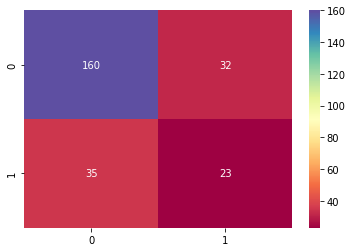

In [ ]:
sns.heatmap(cm0, annot=True, fmt='d', cmap='Spectral')
plt.show()

**Support vector machine**

In [ ]:


svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
# accuracy_score, confusion_matrix and classification_report


In [ ]:


svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

cm1 =(confusion_matrix(y_test, y_pred))
print(cm1)
print(classification_report(y_test, y_pred))
sensitivity1=cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Training accuracy of Support Vector Classifier is : 0.8626666666666667
Test accuracy of Support Vector Classifier is : 0.78
[[190   2]
 [ 53   5]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       192
           1       0.71      0.09      0.15        58

    accuracy                           0.78       250
   macro avg       0.75      0.54      0.51       250
weighted avg       0.77      0.78      0.71       250

Sensitivity :  0.9895833333333334
Specificity :  0.08620689655172414


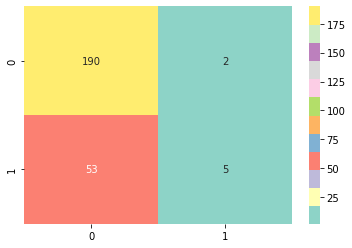

In [ ]:
sns.heatmap(cm1, annot=True, fmt='d', cmap='Set3')
plt.show()

**RANDOM FOREST CLASSIFIERS**

In [ ]:

randomforest = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
randomforest.fit(X_train, y_train)

y_pred = randomforest.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

randomforest_train_acc = accuracy_score(y_train, randomforest.predict(X_train))
randomforest_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {randomforest_train_acc}")
print(f"Test accuracy of Random Forest is : {randomforest_test_acc}")

cm2 =(confusion_matrix(y_test, y_pred))
print(cm2)
print(classification_report(y_test, y_pred))
sensitivity2=cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )

specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)

Training accuracy of Random Forest is : 0.96
Test accuracy of Random Forest is : 0.768
[[188   4]
 [ 54   4]]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       192
           1       0.50      0.07      0.12        58

    accuracy                           0.77       250
   macro avg       0.64      0.52      0.49       250
weighted avg       0.71      0.77      0.69       250

Sensitivity :  0.9791666666666666
Specificity :  0.06896551724137931


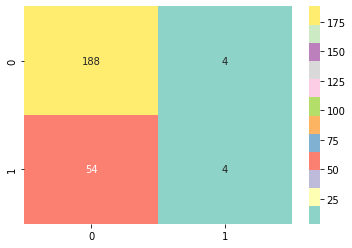

In [ ]:
sns.heatmap(cm2, annot=True, fmt='d', cmap='Set3')
plt.show()

**XGB CLASSIFIERS**

In [ ]:



xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [ ]:
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

cm3 = (confusion_matrix(y_test, y_pred))
print(cm3)
print(classification_report(y_test, y_pred))
sensitivity3=cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity3 )

specificity3 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity : ', specificity3)

Training accuracy of XgBoost is : 0.8973333333333333
Test accuracy of XgBoost is : 0.8
[[177  15]
 [ 35  23]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88       192
           1       0.61      0.40      0.48        58

    accuracy                           0.80       250
   macro avg       0.72      0.66      0.68       250
weighted avg       0.78      0.80      0.78       250

Sensitivity :  0.921875
Specificity :  0.39655172413793105


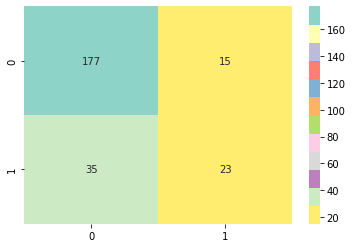

In [ ]:
sns.heatmap(cm3, annot=True, fmt='d', cmap='Set3_r')
plt.show()

**Plotting the imbalanceness**



In [ ]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

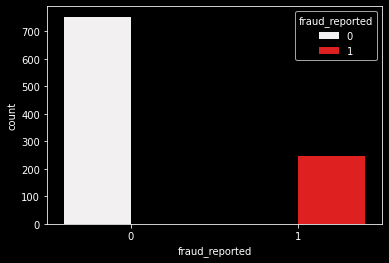

In [ ]:
plt.style.use('dark_background')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported',color ='red')

**Applying oversampling to optimize the model - SMOTE**

**DECISION TREE WITH SMOTE**

In [ ]:

classifier = DecisionTreeClassifier #we will use the Random Forest classifier


In [ ]:

print("normal data distribution: {}".format(Counter(y_train)))
X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)

print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 561, 1: 189})
SMOTE data distribution: Counter({0: 561, 1: 561})


In [ ]:
DT = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3)
DT.fit(X_smote, y_smote)

y_pred = DT.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

DTsmote_train_acc = accuracy_score(y_smote, DT.predict(X_smote))
DTsmote_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision tree is : {DTsmote_train_acc}")
print(f"Test accuracy of Decision tree : {DTsmote_test_acc}")

cm4 =confusion_matrix(y_test, y_pred)
print(cm4)
print(classification_report(y_test, y_pred))
sensitivity4 =cm4[0,0]/(cm4[0,0]+cm4[0,1])
print('Sensitivity : ', sensitivity4 )

specificity4 = cm4[1,1]/(cm4[1,0]+cm4[1,1])
print('Specificity : ', specificity4)

Training accuracy of Decision tree is : 0.8698752228163993
Test accuracy of Decision tree : 0.62
[[129  63]
 [ 32  26]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       192
           1       0.29      0.45      0.35        58

    accuracy                           0.62       250
   macro avg       0.55      0.56      0.54       250
weighted avg       0.68      0.62      0.64       250

Sensitivity :  0.671875
Specificity :  0.4482758620689655


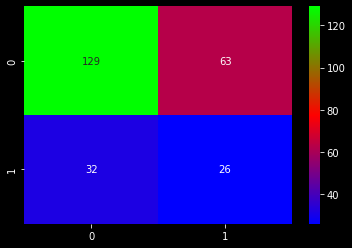

In [ ]:
sns.heatmap(cm4, annot=True, fmt='d', cmap='brg')
plt.show()

**SVC WITH SMOTE**

In [ ]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE


classifier = SVC #we will use the Random Forest classifier


In [ ]:
from collections import Counter
print("normal data distribution: {}".format(Counter(y_train)))
X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)

print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 561, 1: 189})
SMOTE data distribution: Counter({0: 561, 1: 561})


In [ ]:
SV = SVC()
SV.fit(X_smote, y_smote)

y_pred = SV.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

SVsmote_train_acc = accuracy_score(y_smote, SV.predict(X_smote))
SVsmote_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of SVM is : {SVsmote_train_acc}")
print(f"Test accuracy of SVM is : {SVsmote_test_acc}")

cm5 =confusion_matrix(y_test, y_pred)
print(cm5)
print(classification_report(y_test, y_pred))
sensitivity5=cm5[0,0]/(cm5[0,0]+cm5[0,1])
print('Sensitivity : ', sensitivity5 )

specificity5 = cm5[1,1]/(cm5[1,0]+cm5[1,1])
print('Specificity : ', specificity5)

Training accuracy of SVM is : 0.9536541889483066
Test accuracy of SVM is : 0.788
[[182  10]
 [ 43  15]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       192
           1       0.60      0.26      0.36        58

    accuracy                           0.79       250
   macro avg       0.70      0.60      0.62       250
weighted avg       0.76      0.79      0.75       250

Sensitivity :  0.9479166666666666
Specificity :  0.25862068965517243


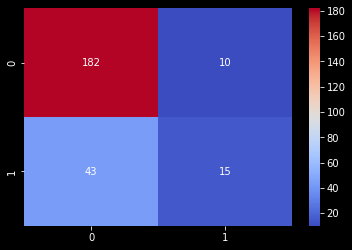

In [ ]:
sns.heatmap(cm5, annot=True, fmt='d', cmap='coolwarm')
plt.show()

**RANDOM FOREST WITH SMOTE**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

classifier = RandomForestClassifier #we will use the Random Forest classifier



In [ ]:
from collections import Counter
print("normal data distribution: {}".format(Counter(y_train)))
X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)

print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 561, 1: 189})
SMOTE data distribution: Counter({0: 561, 1: 561})


In [ ]:
X_smote

,months_as_customer,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,-0.850675,2.146235,-0.902285,0.945721,0.767126,1.094608,0.011443,1.376481,1.863635,1.855250,...,1,1,0,0,0,0,0,1,0,1
1,-0.360133,3.016331,0.088516,0.945721,-0.238721,1.094608,1.237495,0.478776,-0.004854,-0.002938,...,1,0,0,0,0,0,0,1,0,0
2,0.182046,-0.464051,0.632556,-0.640308,-1.244568,-0.860049,0.011443,-1.316634,-1.450366,-1.354718,...,0,1,0,0,0,1,0,0,0,1
3,-1.659639,-0.464051,0.304691,-1.158268,-0.238721,-0.860049,0.011443,1.376481,-0.125998,1.279416,...,0,0,0,0,0,0,0,1,1,0
4,-0.953947,-0.464051,-0.902285,-0.218796,1.485588,-0.860049,0.011443,-1.316634,0.529000,0.527973,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1.607985,-0.464051,0.873316,0.945721,-0.093133,-0.860049,-1.214609,-0.646315,-0.210296,-0.207247,...,1,0,0,0,0,0,0,1,0,0
1118,-0.521294,-0.464051,-0.902285,0.800803,0.975421,1.094608,0.011443,-0.650897,0.444832,-0.262917,...,0,0,0,0,1,0,0,0,0,0
1119,0.926112,-0.464051,0.866870,0.945721,0.940780,1.313467,-0.263114,-1.316634,0.091229,-0.476290,...,0,0,0,0,0,0,0,0,0,0
1120,1.722609,-0.464051,-0.902285,-0.576788,-0.055706,-0.860049,-1.214609,-1.316634,-0.381834,-0.377840,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y_smote

0       0
1       1
2       0
3       1
4       0
       ..
1117    1
1118    1
1119    1
1120    1
1121    1
Name: fraud_reported, Length: 1122, dtype: int64

In [ ]:
randomforest = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
randomforest.fit(X_smote, y_smote)

y_pred = randomforest.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

randomforestsmote_train_acc = accuracy_score(y_smote, randomforest.predict(X_smote))
randomforestsmote_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {randomforestsmote_train_acc}")
print(f"Test accuracy of Random Forest is : {randomforestsmote_test_acc}")

cm6 =confusion_matrix(y_test, y_pred)
print(cm6)
print(classification_report(y_test, y_pred))
sensitivity6=cm6[0,0]/(cm6[0,0]+cm6[0,1])
print('Sensitivity : ', sensitivity6 )

specificity6 = cm6[1,1]/(cm6[1,0]+cm6[1,1])
print('Specificity : ', specificity6)

Training accuracy of Random Forest is : 0.9723707664884136
Test accuracy of Random Forest is : 0.788
[[172  20]
 [ 33  25]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       192
           1       0.56      0.43      0.49        58

    accuracy                           0.79       250
   macro avg       0.70      0.66      0.68       250
weighted avg       0.77      0.79      0.78       250

Sensitivity :  0.8958333333333334
Specificity :  0.43103448275862066


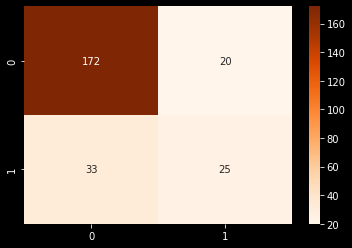

In [ ]:
sns.heatmap(cm6, annot=True, fmt='d', cmap='Oranges')
plt.show()

**XGBOOST USING SMOTE**

In [ ]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


classifier = XGBClassifier


In [ ]:
from collections import Counter
print("normal data distribution: {}".format(Counter(y_train)))
X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)

print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 561, 1: 189})
SMOTE data distribution: Counter({0: 561, 1: 561})


In [ ]:
xgb = XGBClassifier()
xgb.fit(X_smote, y_smote)

y_pred = xgb.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

XGBsmote_train_acc = accuracy_score(y_smote, xgb.predict(X_smote))
XGBsmote_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XGBOOST Classifier is : {XGBsmote_train_acc}")
print(f"Test accuracy of XGBOOST Classifier is : {XGBsmote_test_acc}")

cm7 = (confusion_matrix(y_test, y_pred))
print(cm7)
print(classification_report(y_test, y_pred))
sensitivity7=cm7[0,0]/(cm7[0,0]+cm7[0,1])
print('Sensitivity : ', sensitivity7 )

specificity7 = cm7[1,1]/(cm7[1,0]+cm7[1,1])
print('Specificity : ', specificity7)

Training accuracy of XGBOOST Classifier is : 0.9180035650623886
Test accuracy of XGBOOST Classifier is : 0.808
[[174  18]
 [ 30  28]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       192
           1       0.61      0.48      0.54        58

    accuracy                           0.81       250
   macro avg       0.73      0.69      0.71       250
weighted avg       0.80      0.81      0.80       250

Sensitivity :  0.90625
Specificity :  0.4827586206896552


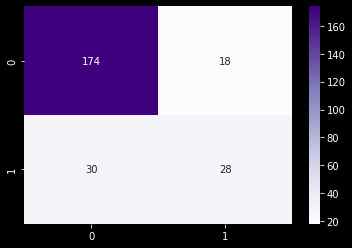

In [ ]:
sns.heatmap(cm7, annot=True, fmt='d', cmap='Purples')
plt.show()

**ADASYN**

**DT with ADASYN**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


classifier = DecisionTreeClassifier #we will use the Random Forest classifier


In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter
print("normal data distribution: {}".format(Counter(y_train)))
ada = ADASYN(random_state = 120)
X_train_ada,y_train_ada = ada.fit_resample(X_train,y_train)

print("ADASYN data distribution: {}".format(Counter(y_train_ada)))




normal data distribution: Counter({0: 561, 1: 189})
ADASYN data distribution: Counter({0: 561, 1: 559})


In [ ]:
DT = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3)
DT.fit(X_train_ada, y_train_ada)

y_pred = DT.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

DTadasyn_train_acc = accuracy_score(y_train_ada, DT.predict(X_train_ada))
DTadasyn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision tree is : {DTadasyn_train_acc}")
print(f"Test accuracy of Decision tree is : {DTadasyn_test_acc}")

cm8 =confusion_matrix(y_test, y_pred)
print(cm8)
print(classification_report(y_test, y_pred))
sensitivity8=cm8[0,0]/(cm8[0,0]+cm8[0,1])
print('Sensitivity : ', sensitivity8 )

specificity8 = cm8[1,1]/(cm8[1,0]+cm8[1,1])
print('Specificity : ', specificity8)

Training accuracy of Decision tree is : 0.8741071428571429
Test accuracy of Decision tree is : 0.712
[[154  38]
 [ 34  24]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       192
           1       0.39      0.41      0.40        58

    accuracy                           0.71       250
   macro avg       0.60      0.61      0.61       250
weighted avg       0.72      0.71      0.72       250

Sensitivity :  0.8020833333333334
Specificity :  0.41379310344827586


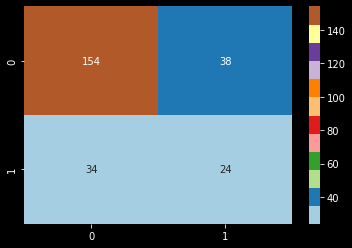

In [ ]:
sns.heatmap(cm8, annot=True, fmt='d', cmap='Paired')
plt.show()

**SVM with ADASYN**

In [ ]:
from sklearn.svm import SVC
from imblearn.over_sampling import ADASYN

classifier = SVC #we will use the Random Forest classifier


In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter
print("normal data distribution: {}".format(Counter(y_train)))
ada = ADASYN(random_state = 120)
X_train_ada,y_train_ada = ada.fit_resample(X_train,y_train)

print("ADASYN data distribution: {}".format(Counter(y_train_ada)))




normal data distribution: Counter({0: 561, 1: 189})
ADASYN data distribution: Counter({0: 561, 1: 559})


In [ ]:
svc_ada = SVC()
svc_ada.fit(X_train_ada, y_train_ada)

y_pred = svc_ada.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svcadasyn_train_acc = accuracy_score(y_train_ada, svc.predict(X_train_ada))
svcadasyn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support vector machine is : {svcadasyn_train_acc}")
print(f"Test accuracy ofSupport vector machine is : {svcadasyn_test_acc}")

cm9 =confusion_matrix(y_test, y_pred)
print(cm9)
print(classification_report(y_test, y_pred))
sensitivity9=cm9[0,0]/(cm9[0,0]+cm9[0,1])
print('Sensitivity : ', sensitivity9 )

specificity9 = cm9[1,1]/(cm9[1,0]+cm9[1,1])
print('Specificity : ', specificity9)

Training accuracy of Support vector machine is : 0.7053571428571429
Test accuracy ofSupport vector machine is : 0.776
[[179  13]
 [ 43  15]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       192
           1       0.54      0.26      0.35        58

    accuracy                           0.78       250
   macro avg       0.67      0.60      0.61       250
weighted avg       0.74      0.78      0.75       250

Sensitivity :  0.9322916666666666
Specificity :  0.25862068965517243


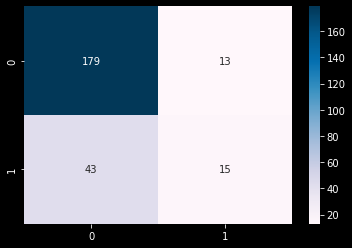

In [ ]:
sns.heatmap(cm9, annot=True, fmt='d', cmap='PuBu')
plt.show()

**RF with ADASYN**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
classifier = RandomForestClassifier #we will use the Random Forest classifier


In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter
print("normal data distribution: {}".format(Counter(y_train)))
ada = ADASYN(random_state = 120)
X_train_ada,y_train_ada = ada.fit_resample(X_train,y_train)

print("ADASYN data distribution: {}".format(Counter(y_train_ada)))




normal data distribution: Counter({0: 561, 1: 189})
ADASYN data distribution: Counter({0: 561, 1: 559})


In [ ]:
rf_ada = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rf_ada.fit(X_train_ada, y_train_ada)

y_pred = rf_ada.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rfadasyn_train_acc = accuracy_score(y_train_ada, rf_ada.predict(X_train_ada))
rfadasyn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of RandomForest is : {rfadasyn_train_acc}")
print(f"Test accuracy of RandomForest is : {rfadasyn_test_acc}")

cm10 =confusion_matrix(y_test, y_pred)
print(cm10)
print(classification_report(y_test, y_pred))
sensitivity10=cm10[0,0]/(cm10[0,0]+cm10[0,1])
print('Sensitivity : ', sensitivity10 )

specificity10 = cm10[1,1]/(cm10[1,0]+cm10[1,1])
print('Specificity : ', specificity10)

Training accuracy of RandomForest is : 0.975
Test accuracy of RandomForest is : 0.808
[[176  16]
 [ 32  26]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       192
           1       0.62      0.45      0.52        58

    accuracy                           0.81       250
   macro avg       0.73      0.68      0.70       250
weighted avg       0.79      0.81      0.80       250

Sensitivity :  0.9166666666666666
Specificity :  0.4482758620689655


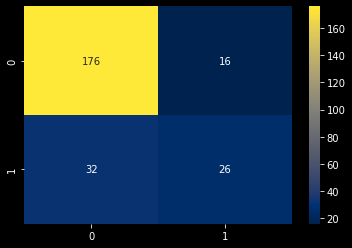

In [ ]:
sns.heatmap(cm10, annot=True, fmt='d', cmap='cividis')
plt.show()

**XGBOOST with ADASYN**

In [ ]:
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN

classifier = XGBClassifier #we will use the Random Forest classifier


In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter
print("normal data distribution: {}".format(Counter(y_train)))
ada = ADASYN(random_state = 120)
X_train_ada,y_train_ada = ada.fit_resample(X_train,y_train)

print("ADASYN data distribution: {}".format(Counter(y_train_ada)))




normal data distribution: Counter({0: 561, 1: 189})
ADASYN data distribution: Counter({0: 561, 1: 559})


In [ ]:
xgb_ada = XGBClassifier()
xgb_ada.fit(X_train_ada, y_train_ada)

y_pred = xgb_ada.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgbadasyn_train_acc = accuracy_score(y_train_ada, xgb_ada.predict(X_train_ada))
xgbadasyn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XGBOOST is : {xgbadasyn_train_acc}")
print(f"Test accuracy of XGBOOST is : {xgbadasyn_test_acc}")

cm11 =confusion_matrix(y_test, y_pred)
print(cm11)
print(classification_report(y_test, y_pred))
sensitivity11=cm11[0,0]/(cm11[0,0]+cm11[0,1])
print('Sensitivity : ', sensitivity11 )

specificity11 = cm11[1,1]/(cm11[1,0]+cm11[1,1])
print('Specificity : ', specificity11)

Training accuracy of XGBOOST is : 0.9241071428571429
Test accuracy of XGBOOST is : 0.8
[[172  20]
 [ 30  28]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       192
           1       0.58      0.48      0.53        58

    accuracy                           0.80       250
   macro avg       0.72      0.69      0.70       250
weighted avg       0.79      0.80      0.79       250

Sensitivity :  0.8958333333333334
Specificity :  0.4827586206896552


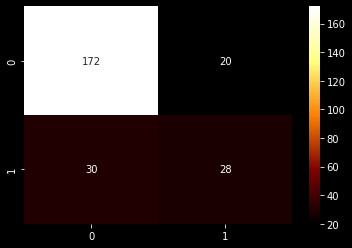

In [ ]:
sns.heatmap(cm11, annot=True, fmt='d', cmap='afmhot')
plt.show()

**Tabulating the test accuracies of dataset before and after optimisation**

In [ ]:
model_list = ['Decision Tree','Support Vector Machine','Random Forest','XGBoost']

testing_Acc = [dtc_test_acc,svc_test_acc,randomforest_test_acc,xgb_test_acc]
testing_Acc_smote = [DTsmote_test_acc,SVsmote_test_acc,randomforestsmote_test_acc,XGBsmote_test_acc]
testing_Acc_Adasyn = [DTadasyn_test_acc,svcadasyn_test_acc,rfadasyn_test_acc,xgbadasyn_test_acc]


df1 = pd.DataFrame({'Model':model_list,'Accuracy': testing_Acc,'Accuracy after SMOTE oversampling':testing_Acc_smote, 'Accuracy after ADASYN oversampling':testing_Acc_Adasyn
})
df1

,Model,Accuracy,Accuracy after SMOTE oversampling,Accuracy after ADASYN oversampling
0,Decision Tree,0.732,0.620,0.712
1,Support Vector Machine,0.780,0.788,0.776
2,Random Forest,0.768,0.788,0.808
3,XGBoost,0.800,0.808,0.800


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

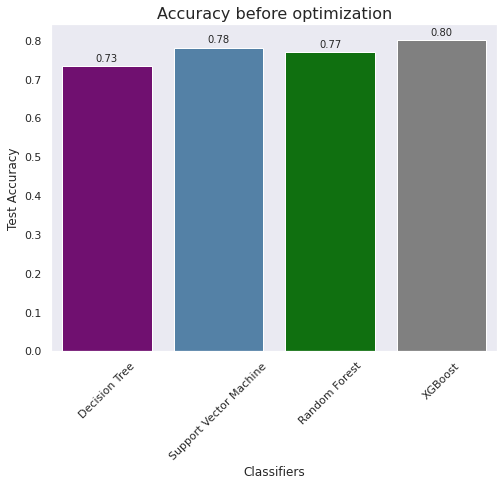

In [ ]:
#Accuracy before optimisation
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='dark')

fig = plt.subplots(figsize =(8, 6))

bp = sns.barplot(x='Model', y= 'Accuracy', data=df1,
         palette=['purple', 'steelblue','green','grey'] )

for bar in bp.patches:
    bp.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


#add overall title
plt.title('Accuracy before optimization', fontsize=16)

#add axis titles
plt.xlabel('Classifiers')
plt.ylabel('Test Accuracy')

#rotate x-axis labels
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

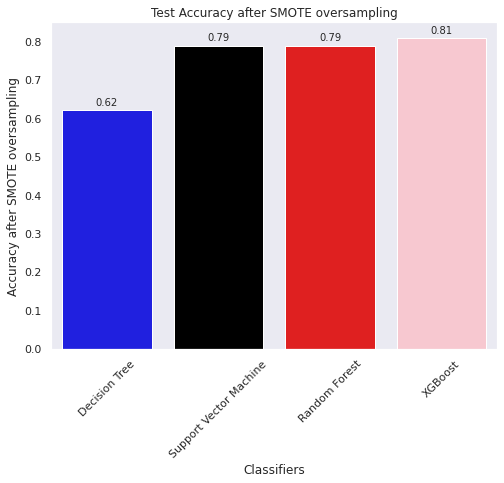

In [ ]:
#Accuracy after using SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.subplots(figsize =(8, 6))
GR = sns.barplot( x = 'Model',y='Accuracy after SMOTE oversampling',data = df1, palette=['blue', 'black','red','pink'])
for bar in GR.patches:
    GR.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('Classifiers')
plt.title('Test Accuracy after SMOTE oversampling')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

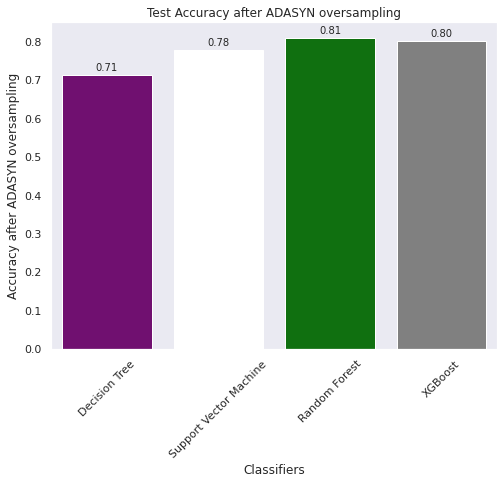

In [ ]:
#Accuracy after using ADASYN
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.subplots(figsize =(8, 6))
GR = sns.barplot( x = 'Model',y='Accuracy after ADASYN oversampling',data = df1, palette=['purple', 'white','green','grey'])
for bar in GR.patches:
    GR.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('Classifiers')
plt.title('Test Accuracy after ADASYN oversampling')
plt.xticks(rotation=45)